# **Movie Recommendation System with Collaborative Filtering**

## Project Overview

Pertumbuhan pasar industri dari film luar negeri ke film dalam negeri semakin menjanjikan. Dilihat dari  jumlah penonton bioskop yang terus meningkat setiap tahunnya. Pada tahun 2018, jumlah penonton bioskop di Indonesia sendiri mencapai lebih dari 50 juta, dengan jumlah produk film luar dan dalam negeri mencapai hampir 200 judul  yang diputar di seluruh Indonesia [1].

Dari sekian banyak film yang diproduksi, sulit bagi calon penonton untuk memutuskan mana yang akan ditonton. Menemukan sebuah film tentu saja membutuhkan waktu, apalagi film tersebut telah menentukan bahwa itu  belum tentu diinginkan oleh calon penonton setelah menonton, sehingga mereka akan menghabiskan  lebih banyak waktu untuk itu. Menonton film di bioskop, platform penyedia layanan streaming, serta menyewa dan membeli DVD juga mahal, sayang sekali jika film yang Anda tonton tidak sesuai keinginan.

Sistem rujukan adalah program atau sistem penyaringan informasi yang merupakan solusi untuk masalah kelebihan informasi dengan  menyaring beberapa informasi penting dari  informasi yang tersedia dan bertindak berdasarkan minat, hubungan minat atau perilaku pengguna dalam suatu item. Sistem rekomendasi dirancang untuk memahami dan memprediksi preferensi pengguna berdasarkan perilaku pengguna [2]. Terdapat beberapa     metode yang dapat digunakan dalam membangun sebuah sistem rekomendasi antara lain *content based filtering*, *collaborative filtering*, dan *hybrid filtering*. *Collaborative filtering* menganalisis pengalaman dan peringkat pengguna sebelumnya dan menghubungkannya dengan pengguna lain [2].

Penulis ingin mempertimbangkan sistem rekomendasi film dengan mendeteksi kesamaan film yang ditonton berdasarkan rating yang diberikan oleh pengguna (*collaborative filtering*), kemudian dimungkinkan untuk mengurutkan berdasarkan rating film yang paling mirip dan akan menjadi rekomendasi film-film yang akan datang untuk ditonton. Jadi calon penonton tidak perlu lagi membuang waktu untuk mencari film satu per satu.

## Business Understanding

Sebagai seorang Data Scientist, tentu Anda ingin memanfaatkan data tersebut untuk meningkatkan transaksi di perusahaan. Sistem ini mencoba memecahkan masalah rekomendasi yang unik yang dihasilkan dari pengabaian data khusus untuk pengguna.

### Problem Statements

Kembangkan sebuah sistem rekomendasi movie untuk menjawab permasalahan berikut:

* Dengan data rating yang Anda miliki, bagaimana perusahaan dapat merekomendasikan movie lain yang mungkin disukai dan belum pernah ditonton oleh pengguna? 

### Goals

Untuk  menjawab pertanyaan tersebut, buatlah sistem rekomendasi dengan tujuan atau goals sebagai berikut:

* Menghasilkan sejumlah rekomendasi movie yang sesuai dengan preferensi pengguna dan belum pernah ditonton sebelumnya dengan teknik *collaborative filtering*.

## Data Understanding

Dataset yang digunakan berupa 2 file csv yang merupakan data rating movie dari pengguna dan data judul movie. Anda dapat mengunduh dataset ini melalui web Kaggle [berikut](https://www.kaggle.com/datasets/dev0914sharma/dataset).

### Data Loading

Supaya isi dataset lebih mudah dipahami, kita perlu melakukan proses loading data terlebih dahulu.

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadamanda","key":"eafd1b3af85f087b31da98e2cf8a1c02"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download dev0914sharma/dataset

  0% 0.00/874k [00:00<?, ?B/s]
100% 874k/874k [00:00<00:00, 125MB/s]


In [5]:
! mkdir data

In [6]:
! unzip dataset -d data

Archive:  dataset.zip
  inflating: data/Dataset.csv        
  inflating: data/Movie_Id_Titles.csv  


In [7]:
# Import library
import pandas as pd
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [8]:
rating = pd.read_csv('/content/data/Dataset.csv')
movie = pd.read_csv('/content/data/Movie_Id_Titles.csv')

print('Jumlah data penilaian yang diberikan pengguna: ', len(rating))
print('Jumlah data movie: ', len(movie))

Jumlah data penilaian yang diberikan pengguna:  100003
Jumlah data movie:  1682


Data penilaian yang diberikan pengguna terdapat 100003 observasi dan data movie terdapat 1682 item.

In [35]:
df = rating
df

,user_id,item_id,rating,timestamp,user,movie
0,0,50,5.0,881250949,0,0
1,0,172,5.0,881250949,0,1
2,0,133,1.0,881250949,0,2
3,196,242,3.0,881250949,1,3
4,186,302,3.0,891717742,2,4
...,...,...,...,...,...,...
99998,880,476,3.0,880175444,876,175
99999,716,204,5.0,879795543,709,248
100000,276,1090,1.0,874795795,38,1004
100001,13,225,2.0,882399156,59,443


Perhatikanlah, data rating memiliki 100003 baris dan 4 kolom.

In [11]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


Dari fungsi df.head(), kita dapat mengetahui bahwa data rating terdiri dari 5 kolom dengan lima kategori rating. Kolom-kolom tersebut antara lain:


* user_id, merupakan identitas pengguna.
* item_id, merupakan identitas movie.
* rating, merupakan data rating untuk movie.
* timestamp, merupakan data waktu saat pengguna memberikan rating pada movie.

Nah, untuk melihat distribusi rating pada data, gunakan fungsi describe()

In [12]:
df.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


Dari output di atas, diketahui bahwa nilai maksimum rating adalah 5 dan nilai minimumnya adalah 1. Artinya, skala rating berkisar antara 1 hingga 5. 

Untuk melihat berapa pengguna yang memberikan rating, jumlah movie, dan jumlah rating, jalankan kode berikut.

In [13]:
print('Jumlah user_id: ', len(df.user_id.unique()))
print('Jumlah item_id: ', len(df.item_id.unique()))
print('Jumlah data rating: ', len(df))

Jumlah user_id:  944
Jumlah item_id:  1682
Jumlah data rating:  100003


In [14]:
movie

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


Untuk data movie memiliki 1682 judul movie dan 2 kolom yang terdiri dari id movie dan judul movie.

## Data Preparation

Pada tahap ini, Anda perlu melakukan persiapan data untuk menyandikan (encode) fitur 'user_id' dan 'item_id' ke dalam indeks integer.

In [15]:
# Mengubah user_id menjadi list tanpa nilai yang sama
user_ids = df['user_id'].unique().tolist()
print('list user_id: ', user_ids)
 
# Melakukan encoding user_id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user_id: ', user_encoded_to_user)

list user_id:  [0, 196, 186, 22, 244, 166, 298, 115, 253, 305, 6, 62, 286, 200, 210, 224, 303, 122, 194, 291, 234, 119, 167, 299, 308, 95, 38, 102, 63, 160, 50, 301, 225, 290, 97, 157, 181, 278, 276, 7, 10, 284, 201, 287, 246, 242, 249, 99, 178, 251, 81, 260, 25, 59, 72, 87, 42, 292, 20, 13, 138, 60, 57, 223, 189, 243, 92, 241, 254, 293, 127, 222, 267, 11, 8, 162, 279, 145, 28, 135, 32, 90, 216, 250, 271, 265, 198, 168, 110, 58, 237, 94, 128, 44, 264, 41, 82, 262, 174, 43, 84, 269, 259, 85, 213, 121, 49, 155, 68, 172, 19, 268, 5, 80, 66, 18, 26, 130, 256, 1, 56, 15, 207, 232, 52, 161, 148, 125, 83, 272, 151, 54, 16, 91, 294, 229, 36, 70, 14, 295, 233, 214, 192, 100, 307, 297, 193, 113, 275, 219, 218, 123, 158, 302, 23, 296, 33, 154, 77, 270, 187, 170, 101, 184, 112, 133, 215, 69, 104, 240, 144, 191, 61, 142, 177, 203, 21, 197, 134, 180, 236, 263, 109, 64, 114, 239, 117, 65, 137, 257, 111, 285, 96, 116, 73, 221, 235, 164, 281, 182, 129, 45, 131, 230, 126, 231, 280, 288, 152, 217, 79, 75

Selanjutnya, lakukan hal yang sama pada fitur 'item_id'.

In [16]:
# Mengubah item_id menjadi list tanpa nilai yang sama
movie_ids = df['item_id'].unique().tolist()
print('list item_id: ', movie_ids)
 
# Melakukan proses encoding item_id
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
print('encoded item_id : ', movie_to_movie_encoded)
 
# Melakukan proses encoding angka ke item_id
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}
print('encoded angka ke item_id: ', movie_encoded_to_movie)

list item_id:  [50, 172, 133, 242, 302, 377, 51, 346, 474, 265, 465, 451, 86, 257, 1014, 222, 40, 29, 785, 387, 274, 1042, 1184, 392, 486, 144, 118, 1, 546, 95, 768, 277, 234, 246, 98, 193, 88, 194, 1081, 603, 796, 32, 16, 304, 979, 564, 327, 201, 1137, 241, 4, 332, 100, 432, 322, 181, 196, 679, 384, 143, 423, 515, 20, 288, 219, 526, 919, 26, 232, 427, 512, 15, 1049, 416, 165, 690, 248, 1444, 5, 229, 237, 480, 54, 366, 518, 403, 111, 625, 338, 25, 1016, 154, 275, 1153, 498, 382, 209, 23, 294, 208, 685, 328, 496, 132, 174, 96, 151, 307, 648, 21, 832, 514, 789, 485, 317, 195, 200, 385, 750, 264, 245, 135, 1147, 471, 658, 140, 379, 815, 479, 368, 1211, 1134, 836, 272, 756, 787, 14, 955, 419, 405, 504, 466, 268, 117, 273, 559, 794, 323, 177, 231, 2, 137, 1336, 164, 281, 1240, 298, 443, 1035, 79, 258, 455, 755, 673, 1217, 719, 1267, 930, 216, 1079, 452, 61, 48, 360, 77, 476, 483, 748, 220, 255, 280, 202, 408, 235, 228, 1098, 347, 178, 478, 688, 10, 127, 106, 69, 944, 790, 1091, 214, 1028, 5

Berikutnya, petakan user_idd dan item_id ke dataframe yang berkaitan.

In [17]:
# Mapping user_id ke dataframe user
df['user'] = df['user_id'].map(user_to_user_encoded)
 
# Mapping item_id ke dataframe movie
df['movie'] = df['item_id'].map(movie_to_movie_encoded)

Terakhir, cek beberapa hal dalam data seperti jumlah user, jumlah movie, dan mengubah nilai rating menjadi float.

In [18]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah movie
num_movie = len(movie_encoded_to_movie)
print(num_movie)
 
# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df['rating'])
 
# Nilai maksimal rating
max_rating = max(df['rating'])
 
print('Number of User: {}, Number of Movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

944
1682
Number of User: 944, Number of Movie: 1682, Min Rating: 1.0, Max Rating: 5.0


### Membagi Data untuk Training dan Validasi

Pada tahap ini kita akan melakukan pembagian data menjadi data training dan validasi. Betul! Namun sebelumnya, acak datanya terlebih dahulu agar distribusinya menjadi random.

In [19]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,user_id,item_id,rating,timestamp,user,movie
87184,330,228,5.0,876547220,316,184
98871,894,318,5.0,879897168,893,202
1956,199,258,4.0,883782403,260,160
11529,181,1374,1.0,878962391,36,1283
39495,314,1016,4.0,877886483,265,90
...,...,...,...,...,...,...
6265,279,216,3.0,884983225,76,168
54886,815,173,5.0,878695241,809,322
76820,671,550,3.0,884035406,669,368
860,79,50,4.0,891271545,210,0


Selanjutnya, kita bagi data train dan validasi dengan komposisi 99:1. Namun sebelumnya, kita perlu memetakan (mapping) data user dan movie menjadi satu value terlebih dahulu. Lalu, buatlah rating dalam skala 0 sampai 1 agar mudah dalam melakukan proses training.

In [20]:
# Membuat variabel x untuk mencocokkan data user dan movie menjadi satu value
x = df[['user', 'movie']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.99 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[316 184]
 [893 202]
 [260 160]
 ...
 [669 368]
 [210   0]
 [ 13 822]] [1.   1.   0.75 ... 0.5  0.75 0.25]


## Modeling

Pada tahap ini, kita akan mengembangkan model machine learning dengan menerapkan teknik collaborative filtering pada data.

### Proses Training

Pada tahap ini, model menghitung skor kecocokan antara pengguna dan movie dengan teknik embedding. Pertama, kita melakukan proses embedding terhadap data user dan movie. Selanjutnya, lakukan operasi perkalian dot product antara embedding user dan movie. Selain itu, kita juga dapat menambahkan bias untuk setiap user dan movie. Skor kecocokan ditetapkan dalam skala [0,1] dengan fungsi aktivasi sigmoid.

Di sini, kita membuat class RecommenderNet dengan keras Model class. Kode class RecommenderNet ini terinspirasi dari tutorial dalam situs Keras dengan beberapa adaptasi sesuai kasus yang sedang kita selesaikan.

In [21]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movie
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movie bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2) 
 
    x = dot_user_movie + user_bias + movie_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

Selanjutnya, lakukan proses compile terhadap model.

In [22]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Model ini menggunakan Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation. 

Langkah berikutnya, mulailah proses training. 

In [33]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 512,
    epochs = 80,
    validation_data = (x_val, y_val)
)

Epoch 1/80
194/194 [==============================] - 1s 6ms/step - loss: 0.6253 - root_mean_squared_error: 0.2538 - val_loss: 0.6203 - val_root_mean_squared_error: 0.2445
Epoch 2/80
194/194 [==============================] - 1s 7ms/step - loss: 0.6305 - root_mean_squared_error: 0.2526 - val_loss: 0.6207 - val_root_mean_squared_error: 0.2448
Epoch 3/80
194/194 [==============================] - 1s 6ms/step - loss: 0.6294 - root_mean_squared_error: 0.2575 - val_loss: 0.6187 - val_root_mean_squared_error: 0.2433
Epoch 4/80
194/194 [==============================] - 1s 5ms/step - loss: 0.6334 - root_mean_squared_error: 0.2548 - val_loss: 0.6197 - val_root_mean_squared_error: 0.2453
Epoch 5/80
194/194 [==============================] - 1s 6ms/step - loss: 0.6267 - root_mean_squared_error: 0.2552 - val_loss: 0.6209 - val_root_mean_squared_error: 0.2445
Epoch 6/80
194/194 [==============================] - 1s 5ms/step - loss: 0.6282 - root_mean_squared_error: 0.2515 - val_loss: 0.6165 - val_

## **Evaluasi**

Metrik evaluasi yang digunakan pada prediksi ini adalah root mean squared error (RMSE).

### Visualisasi Metrik

Untuk melihat visualisasi proses training, mari kita plot metrik evaluasi dengan matplotlib.

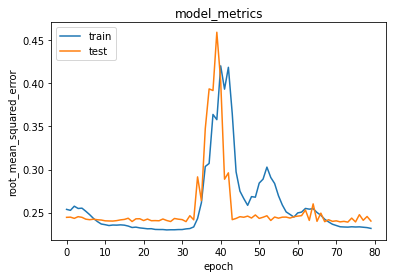

In [34]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Perhatikanlah, proses training model konvergen pada epochs sekitar 80. Dari proses ini, kita memperoleh nilai error akhir sebesar sekitar 0.23 dan error pada data validasi sebesar 0.24. Nilai tersebut cukup bagus untuk sistem rekomendasi. 

### Mendapatkan Rekomendasi movie

In [25]:
movie_df = movie
df = pd.read_csv('/content/data/Dataset.csv')
 
# Mengambil sample user
user_id = df.user_id.sample(1).iloc[0]
movie_visited_by_user = df[df.user_id == user_id]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
movie_not_visited = movie_df[~movie_df['item_id'].isin(movie_visited_by_user.item_id.values)]['item_id'] 
movie_not_visited = list(
    set(movie_not_visited)
    .intersection(set(movie_to_movie_encoded.keys()))
)
 
movie_not_visited = [[movie_to_movie_encoded.get(x)] for x in movie_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_visited), movie_not_visited)
)

Selanjutnya, untuk memperoleh rekomendasi movieran, gunakan fungsi model.predict() dari library Keras dengan menerapkan kode berikut.

In [26]:
ratings = model.predict(user_movie_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('movie with high ratings from user')
print('----' * 8)
 
top_movie_user = (
    movie_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .item_id.values
)
 
movie_df_rows = movie_df[movie_df['item_id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.title)
 
print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)
 
recommended_movie = movie_df[movie_df['item_id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title)

Showing recommendations for users: 286
movie with high ratings from user
--------------------------------
Playing God (1997)
Mad City (1997)
Addicted to Love (1997)
Pump Up the Volume (1990)
Romy and Michele's High School Reunion (1997)
--------------------------------
Top 10 movie recommendation
--------------------------------
Shawshank Redemption, The (1994)
Wallace & Gromit: The Best of Aardman Animation (1996)
Schindler's List (1993)
Rear Window (1954)
Prefontaine (1997)
Star Kid (1997)
Faust (1994)
Pather Panchali (1955)
Saint of Fort Washington, The (1993)
Santa with Muscles (1996)


Sebagai contoh, hasil di atas adalah rekomendasi untuk user dengan id 286. Dari output tersebut, kita dapat membandingkan antara movie with high ratings from user dan Top 10 movie recommendation untuk user.

## **Kesimpulan**

Berdasarkan dari hasil  pengujian dan analisis dari implementasi yang telah dilakukan dapat disimpulkan bahwa sistem rekomendasi dengan teknik *collaborative filtering* sudah mencapai hasil yang baik dengan nilai error akhir sebesar sekitar 0.23 dan error pada data validasi sebesar 0.24.

## **Sumber Referensi**

[1] Tren Positif Film Indonesia, ‘Industri perfilman Indonesia semakin berkembang. Tren positip dan konsisten baik dari jumlah penonton maupun jumlah judul yang terdata sejak  tahun 2016-2018’, https://indonesia.go.id/ragam/seni/sosial/tren-positif-film-indonesia, 2019. (Diakses pada 2 Agustus 2022)

[2] Reddy, S. R. S. et al, ‘Content-Based Movie  Recommendation  System Using Genre Correlation’, in Satapathy, S. C., Bhateja,  V., and Das, S. (eds) Smart Intelligent Computing and Applications. Singapore: Springer Singapore, pp. 391–397, 2019.